<a href="https://colab.research.google.com/github/jofella/Google-Colab/blob/main/GARCH_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is a gerneric introduction working with the GARCH model and appying it to real world stock data**
[Source](https://pyquantnews.com/find-market-mispricings-like-the-pros/)

# **1. Get stock price data**

In [ ]:
#Install packages
!pip install yfinance
!pip install arch

In [19]:
#Import packages
import numpy as np
import yfinance as yf
from arch import arch_model

In [20]:
#Set matplotlib framework
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(16, 6))
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

%matplotlib inline

In [ ]:
##Get data - use yfinance
start ="2020-01-01"
end ="2022-07-31"

data = yf.download("aapl",start=start, end= end)

#Calcualte returns
adjusted_closes = data['Adj Close']
returns = 100 * adjusted_closes.pct_change().dropna()

# **2. Fit a GARCH model**

In [ ]:
##Fit a GARCH model
model = arch_model(returns)
res = model.fit()

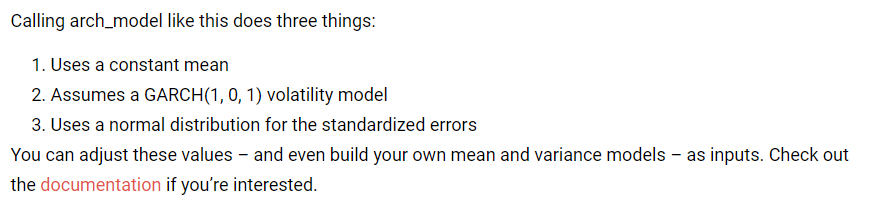

[Documentation](https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_forecasting.html)

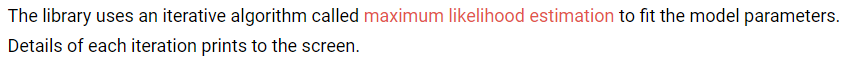

[Documentation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)

# **3. Forecast the volatility**

In [26]:
##Check the summary
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1386.02
Distribution:                  Normal   AIC:                           2780.05
Method:            Maximum Likelihood   BIC:                           2797.94
                                        No. Observations:                  648
Date:                Thu, Mar 02 2023   Df Residuals:                      647
Time:                        18:42:15   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2180  7.860e-02      2.774  5.541e-03 [6.397e-0

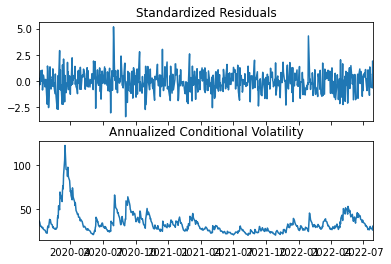

In [32]:
##Visualize the standardized residuals and conditional volatility
fig = res.plot("D")

In [36]:
##Get the variance forecast - Horizon controls the number of datapoints used: this case 1 date
forecast = res.forecast(horizon=1, reindex=False)
variance_forecast = forecast.variance.iloc[-1][0]

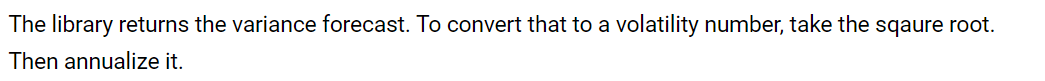

In [40]:
#Compute the annualized volatility forecast
trading_days = 252

volatility_forecast = np.sqrt(variance_forecast)
annualized_volatility_forecast = volatility_forecast * np.sqrt(trading_days) / 100

In [41]:
##Get results
print(volatility_forecast, annualized_volatility_forecast)

2.0763552684447357 0.32961118042341175


# **Further Application**

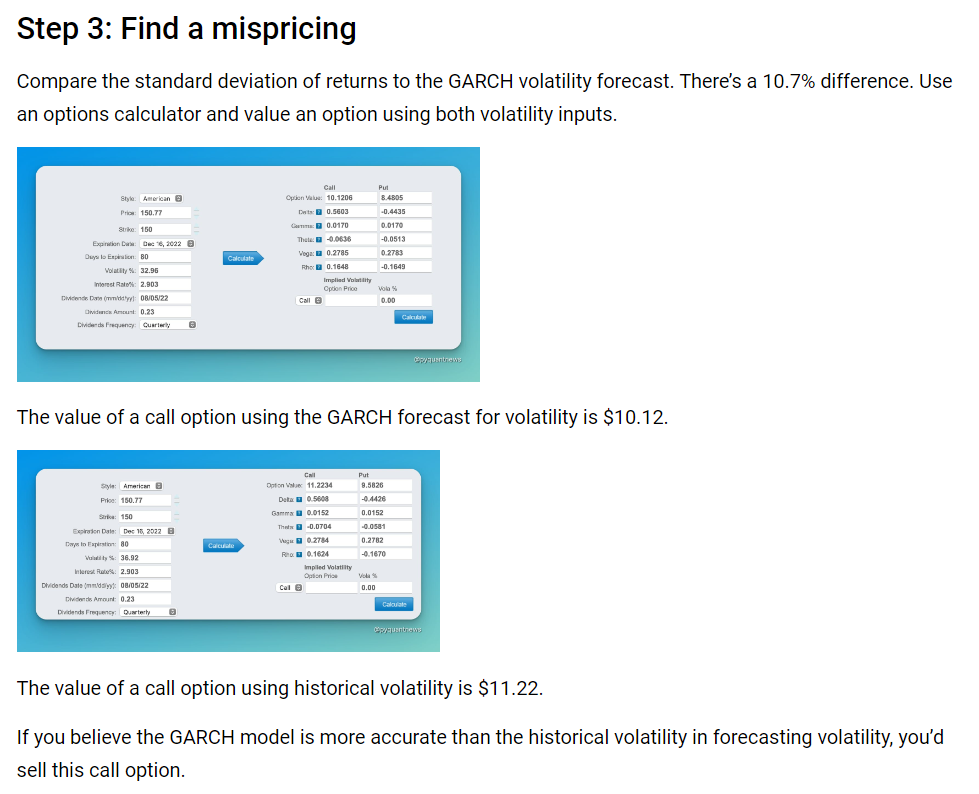